In [490]:
import random 
import math
from statistics import mean
from sklearn.datasets.samples_generator import make_blobs
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import urllib.request as url
import numpy as np
import scanpy as sc
import pandas as pd
import tarfile
import csv
import time
from numba import njit, jit
from sklearn.base import BaseEstimator, ClusterMixin, TransformerMixin

--- 0.022060394287109375 seconds ---


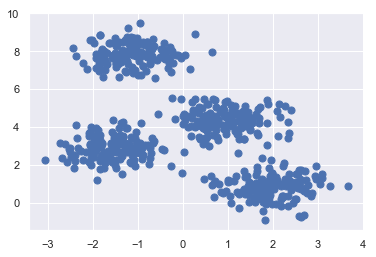

In [491]:
#generate data
start_time = time.time()
X, y = make_blobs(n_samples=600, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);
print("--- %s seconds ---" % (time.time() - start_time))

In [589]:
    def plusplus(data):
        dot = np.random.choice(len(data), replace=False) # random startpunkt
        clusters = np.array([data[dot]])
        pointer = np.array([])
        for i in range (k-1):
            D = np.array([])
            
            for j in range (len(data)):
                D = np.append(D,np.min(np.sum((data[j]-clusters)**2, axis = 1)))
                
            pointer = np.append(pointer, D, axis = 0) 
            
            p = D/np.sum(D)
            cummulative_p = np.cumsum(p)
            
            r = random.random()
            ind = np.where(cummulative_p >= r)[0][0]
            
            clusters = np.append(clusters,[data[ind]], axis = 0)
        return D, clusters, pointer
        

In [531]:
data = X
k = 2
plusplus(data)
#np.min(np.sum((data[2]-clusters)**2, axis = 1))

(array([1.16168505e+01, 2.14694809e+01, 1.51280044e+01, 1.58139543e+01,
        1.91118774e+01, 7.97109247e+00, 4.47791045e+00, 1.27099427e+00,
        1.11791854e-01, 1.25767875e+01, 1.18968950e+01, 2.60058853e+01,
        1.32512479e-01, 7.48962653e+00, 1.65360122e-01, 3.87667684e+00,
        2.41133117e+01, 7.48067231e+00, 7.21379388e+00, 4.89430187e+00,
        1.02948807e+01, 4.41274148e+00, 1.73266820e+01, 4.17337709e+00,
        3.80081413e+00, 5.38167780e-01, 9.44165780e+00, 6.94118569e+00,
        1.13766352e+00, 2.30392251e+01, 1.13987898e+00, 4.79359359e-01,
        6.64484472e+00, 1.41760498e+01, 7.13896300e-01, 4.06503209e+00,
        8.95573055e+00, 1.13547031e+01, 2.09254228e-01, 3.71070652e-01,
        1.17214343e+01, 2.22553712e-01, 2.63267726e+01, 8.03550355e-02,
        8.82143143e-01, 5.70433970e-01, 1.30844144e+01, 3.57518580e+00,
        1.44792865e+01, 1.46633886e+01, 3.42883994e+00, 7.04524272e-02,
        9.97821119e+00, 4.03111228e-01, 1.78106428e+01, 7.808219

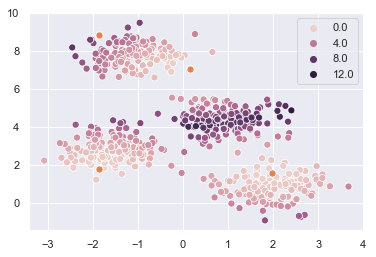

In [661]:
data = X
k = 4
dist, clusters, pointer = plusplus(data)
sns.scatterplot(X[:, 0], X[:, 1], s=50, hue=dist);
sns.scatterplot(clusters[:,0], clusters[:,1], s=50, markers="+")

In [662]:
data = X
k = 2
D, clusters = plusplus(data)
sns.scatterplot(X[:, 0], X[:, 1], s=50, hue=D);
sns.scatterplot(clusters[:,0], clusters[:,1], s=50, markers="+")


ValueError: too many values to unpack (expected 2)

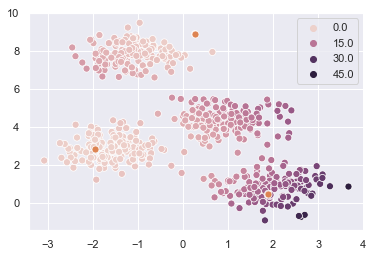

In [502]:
data = X
k = 3
D, clusters = plusplus(data)
sns.scatterplot(X[:, 0], X[:, 1], s=50, hue=D);
sns.scatterplot(clusters[:,0], clusters[:,1], s=50, markers="+")



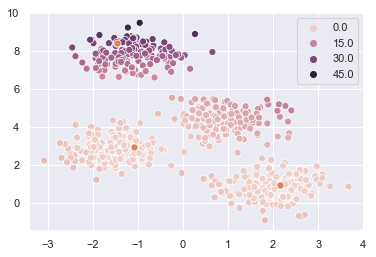

In [503]:
data = X
k = 3
D, clusters = plusplus(data)
sns.scatterplot(X[:, 0], X[:, 1], s=50, hue=D);
sns.scatterplot(clusters[:,0], clusters[:,1], s=50, markers="+")


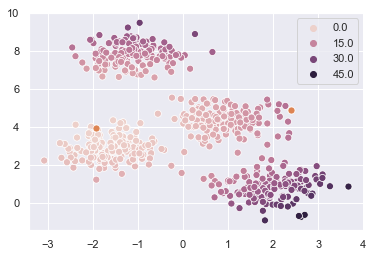

In [407]:
sns.scatterplot(X[:, 0], X[:, 1], s=50, hue=D);
sns.scatterplot(clusters[:,0], clusters[:,1], s=50, markers="+")


In [409]:
np.amax(D)

42.52859805475009

In [506]:
np.min(np.sum((data[2]-clusters)**2, axis = 1))

2.1588593164213297

In [507]:
np.sum((data[2]-clusters)**2, axis = 1)

array([13.55786424,  2.15885932, 77.72399572])

In [508]:
k

3

In [518]:
k = 2
plusplus(data)

[1.52254384e+01 3.58903202e+01 1.35631683e+01 2.40475208e+01
 3.10191521e+01 2.51761467e-01 2.46703833e+01 1.58463621e+01
 7.27256017e+00 4.72905895e-01 1.66849928e+01 3.87808599e+01
 9.85842309e+00 9.23300859e+00 7.41856540e+00 9.33778240e-01
 2.32346504e+01 1.66056946e-01 1.49927011e+01 4.47626344e-01
 4.08648982e-01 1.40792690e+00 3.19148129e+01 1.02556414e+00
 3.11455122e+00 1.06167027e+01 1.46300084e+01 1.80782662e+00
 1.14367164e+01 3.81248886e+01 1.54185505e+01 1.13188144e+01
 1.13107876e+01 1.64190023e+01 1.32750721e+01 2.57135019e+00
 1.39442642e+01 1.79127921e+01 6.27918283e+00 1.19848909e+01
 2.08125468e+01 5.72322253e+00 4.22843021e+01 9.35896397e+00
 7.62091728e+00 1.17074616e+01 2.14420550e+01 1.00137608e+00
 1.62800718e+01 1.74010934e+01 1.32741897e+00 9.37617879e+00
 1.61958058e+01 1.15336692e+01 3.47328452e+01 2.15344632e-01
 3.36309634e+01 1.67999424e+00 5.23813068e-01 3.46116325e+01
 1.97200701e+01 9.01596528e+00 2.28265858e+01 3.41205128e+01
 1.99778842e+01 4.037246

 3.13616117e+01 6.18242134e+00 1.15968083e+01 8.48658386e+00]


(array([1.52254384e+01, 3.58903202e+01, 1.35631683e+01, 2.40475208e+01,
        3.10191521e+01, 2.51761467e-01, 2.46703833e+01, 1.58463621e+01,
        7.27256017e+00, 4.72905895e-01, 1.66849928e+01, 3.87808599e+01,
        9.85842309e+00, 9.23300859e+00, 7.41856540e+00, 9.33778240e-01,
        2.32346504e+01, 1.66056946e-01, 1.49927011e+01, 4.47626344e-01,
        4.08648982e-01, 1.40792690e+00, 3.19148129e+01, 1.02556414e+00,
        3.11455122e+00, 1.06167027e+01, 1.46300084e+01, 1.80782662e+00,
        1.14367164e+01, 3.81248886e+01, 1.54185505e+01, 1.13188144e+01,
        1.13107876e+01, 1.64190023e+01, 1.32750721e+01, 2.57135019e+00,
        1.39442642e+01, 1.79127921e+01, 6.27918283e+00, 1.19848909e+01,
        2.08125468e+01, 5.72322253e+00, 4.22843021e+01, 9.35896397e+00,
        7.62091728e+00, 1.17074616e+01, 2.14420550e+01, 1.00137608e+00,
        1.62800718e+01, 1.74010934e+01, 1.32741897e+00, 9.37617879e+00,
        1.61958058e+01, 1.15336692e+01, 3.47328452e+01, 2.153446

In [590]:
k=3
dist, clusters, pointer = plusplus(data)

In [591]:
pointer

array([13.25798767, 19.57634332, 17.460679  , ...,  1.61304867,
        0.07628937,  0.84523752])

In [592]:
len(pointer)

1200

In [596]:
pointer[1199]

0.8452375181125669

In [607]:
data = X
k = 3
D, clusters, pointer = plusplus(data)

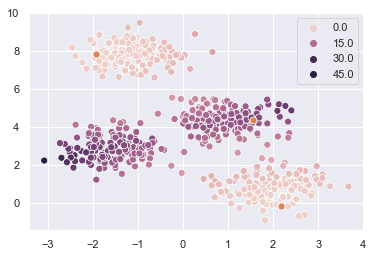

In [631]:
sns.scatterplot(X[:, 0], X[:, 1], s=50, hue=pointer[600:1200]);
sns.scatterplot(clusters[:,0], clusters[:,1], s=50)

In [612]:
clusters[]

array([[-1.93585603,  7.86369967],
       [ 2.17230934, -0.17127405],
       [ 1.54592256,  4.35631807]])

In [634]:
clusters[1:2,0]


array([2.17230934])

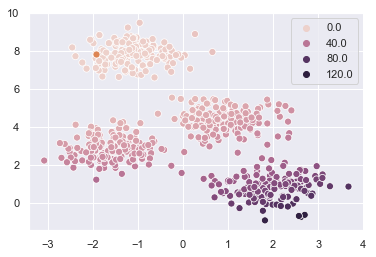

In [639]:
sns.scatterplot(X[:, 0], X[:, 1], s=50, hue=pointer[0:600]);
sns.scatterplot(clusters[0:1,0], clusters[0:1,1], s=50)

#dist to first centroid

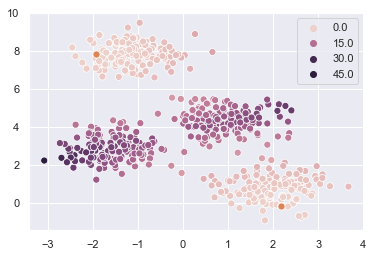

In [640]:
sns.scatterplot(X[:, 0], X[:, 1], s=50, hue=pointer[600:1200]);
sns.scatterplot(clusters[0:2,0], clusters[0:2,1], s=50)
#min dist to centroids